In [165]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import h5py
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = (16.0, 4.0)

In [166]:
import os
print(os.getcwd())

/Users/monabansal/AIML/projects/nn_imageclassification


In [167]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [189]:
#open as readonly
#h5f=h5py.File("/content/My Drive/Neural Networks/SVHN_single_grey1.h5",'r')
with h5py.File("/Users/monabansal/AIML/NeuralNetworks/SVHN_single_grey1.h5",'r') as h5f:
    #load the training,testing and validation'
    X_train=h5f['X_train'][:]
    y_train1=h5f['y_train'][:]
    X_test=h5f['X_test'][:]
    y_test1=h5f['y_test'][:]
    

In [169]:
#Understand the data
no_xtrain_imgs=len(X_train)
no_ytrain_imgs=len(y_train1)
no_xtest_imgs=len(X_test)
no_ytest_imgs=len(y_test1)

In [170]:
print('total input training images:', no_xtrain_imgs)
print('total output training images:', no_ytrain_imgs)

print('total input test images:', no_xtest_imgs)
print('total output test images:', no_ytest_imgs)

total input training images: 42000
total output training images: 42000
total input test images: 18000
total output test images: 18000


In [171]:
#Data preparation
print("Training Set", X_train.shape, y_train1.shape)
print("Test Set", X_test.shape, y_test1.shape)


Training Set (42000, 32, 32) (42000,)
Test Set (18000, 32, 32) (18000,)


# Normalize the Input data

we must normalize our data as it is always required in neural network models

we can achieve this by dividing the RGB codes with 255 (which is the maximum RGB code minus the minimum RGB code)

normalize X_train and X_test

make sure that the values are float so that we can get decimal points after division

In [172]:
# # normalize inputs from 0-255 to 0-1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

# Plot training images

In [173]:
def plot_images(X_img,y_labels,nrows,ncols):
    plt.figure(figsize=(10,1))
    for i in range(10):
        plt.subplot(nrows,ncols,i+1)
        plt.imshow(X_img[i].reshape(32,32))
        plt.title("Label: {}".format(y_labels[i]))
        plt.axis("off")
    plt.show() 

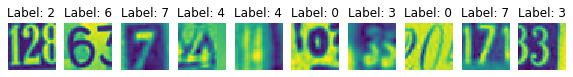

In [174]:
# Plot some training set images
plot_images(X_train, y_train1, 1, 10)

# Plot test data images

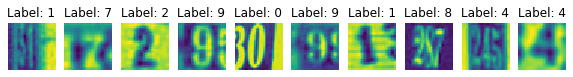

In [175]:
# visualizing the first 10 images in the test dataset and their labels
plot_images(X_test, y_test1, 1, 10)

In [176]:
# as we can see that some of the images are very blur and we can not read the middle digit but we received the correct iamge labels

In [177]:
#To check unique labels
print(np.unique(y_train1))

[0 1 2 3 4 5 6 7 8 9]


# Plotting Distribution of Data

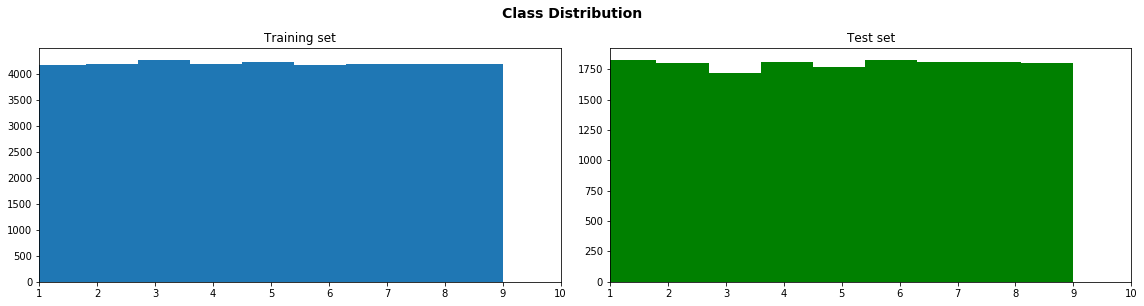

In [178]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train1, bins=10)
ax1.set_title("Training set")
ax1.set_xlim(1, 10)

ax2.hist(y_test1, color='g', bins=10)
ax2.set_title("Test set")

fig.tight_layout()

from the above distributions we can see that all the values have equal weights 

# Data Splitting -  Training to Train+Validation

In [179]:
#Splitting to 20% in Val Set 
#Using random state to regenrate the whole Dataset in re-run
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train1, test_size=0.20, random_state=7)

In [180]:
#data size in each training and val set
y_train.shape, y_val.shape, y_test1.shape

((33600,), (8400,), (18000,))

# Grayscale Conversion

To speed up our experiments we will convert our images from RGB to Grayscale, which grately reduces the amount of data we will have to process.

Y = 0.2990R + 0.5870G + 0.1140B

Here is a simple function that helps us print the size of a numpy array in a human readable format.

In [78]:
def rgb2gray(images):
    #return np.expand_dims(np.dot(images, [0.2990, 0.5870, 0.1140]), axis=3)
    return np.expand_dims(np.dot(images, [0.299, 0.587, 0.114]),axis=2)

In [79]:
train_greyscale = rgb2gray(X_train).astype(np.float32)

ValueError: shapes (33600,32,32) and (3,) not aligned: 32 (dim 2) != 3 (dim 0)

In [59]:
#Converting data type to Float for numpy computation
train_greyscale = rgb2gray(X_train).astype(np.float32)
test_greyscale = rgb2gray(X_test).astype(np.float32)
val_greyscale = rgb2gray(X_val).astype(np.float32)

In [60]:
print("Training Set", train_greyscale.shape)
print("Validation Set", val_greyscale.shape)
print("Test Set", test_greyscale.shape)
print('')

Training Set (33600, 32)
Validation Set (8400, 32)
Test Set (18000, 32)



ValueError: cannot reshape array of size 32 into shape (32,32)

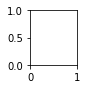

In [66]:
plot_images(train_greyscale, y_train, 1, 10)

TypeError: Invalid shape (32,) for image data

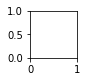

In [70]:
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(train_greyscale[i].reshape(32))
    plt.title("Label: {}".format(y_train[i]))
    plt.axis("off")
plt.show() 

In [150]:
def rgb2gray1(images):
    #return np.expand_dims(np.dot(images, [0.2990, 0.5870, 0.1140]), axis=3)
    return np.dot(images[...,:3], [0.299, 0.587, 0.114])

In [151]:
X_train.shape

(33600, 32, 32)

In [101]:
X_train[:, :, 4]

array([[116.8312, 113.8315, 108.0601, ..., 118.9558, 123.8413, 124.8412],
       [ 52.5989,  46.6596,  54.42  , ...,  52.7991,  48.1155,  53.9578],
       [144.6462, 143.6463, 143.6463, ...,  74.4945,  75.4944,  77.8963],
       ...,
       [108.1283, 101.5419,  91.6569, ..., 119.9592, 128.7303, 133.9147],
       [104.8505, 105.8504, 110.437 , ...,  90.2542,  97.4276,  98.4275],
       [193.9393, 185.6412, 187.6841, ..., 172.63  , 175.6297, 176.9393]],
      dtype=float32)

In [152]:
train_greyscale1 = rgb2gray1(X_train).astype(np.float32)

In [153]:
train_greyscale1.shape,y_train.shape,X_train.shape

((33600, 32), (33600,), (33600, 32, 32))

In [143]:
def rgb2gray2(images):
    #return np.expand_dims(np.dot(images, [0.2990, 0.5870, 0.1140]), axis=3)
    return np.expand_dims(np.dot(images[...,:3], [0.299, 0.587, 0.114]), axis=2)

In [144]:
train_greyscale1 = rgb2gray2(X_train)

In [155]:
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,0])
       # ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

# One Hot Label Encoding
Apply One Hot Encoding to make label suitable for CNN Classification

In [181]:
from sklearn.preprocessing import OneHotEncoder
 
# Fit the OneHotEncoder
enc = OneHotEncoder().fit(y_train.reshape(-1, 1))

# Transform the label values to a one-hot-encoding scheme
y_train = enc.transform(y_train.reshape(-1, 1)).toarray()
y_test = enc.transform(y_test1.reshape(-1, 1)).toarray()
y_val = enc.transform(y_val.reshape(-1, 1)).toarray()

print("Training set", y_train.shape)
print("Validation set", y_val.shape)
print("Test set", y_test.shape)

Training set (33600, 10)
Validation set (8400, 10)
Test set (18000, 10)


Label:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


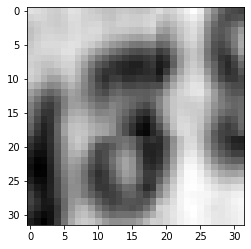

In [186]:
#Let's print one image after one-hot encoding
print("Label: ", y_train[3])
plt.imshow(X_train[2], cmap='gray')

In [187]:
from tensorflow.keras.utils import to_categorical

ModuleNotFoundError: No module named 'tensorflow'

In [188]:
import seaborn